# ドジャーズの勝ちパターン（負けパターン）を見つけ出す
- 平均的に何点とると勝てるか
- 平均的に何点失点すると負けるか
- 大谷がホームランを打つと勝ちやすいか

In [1]:
import requests, io
import pandas as pd
pd.set_option('display.max_rows', 180)
pd.set_option('display.max_columns', 100)
dodgers = "https://www.ces-alpha.org/course/file_serve/4870492009791488/Dodgers2024.csv" #アップロードしたファイルのURL
d = requests.get(dodgers)
dodgers_df = pd.read_csv(io.BytesIO(d.content), encoding='ms932', sep=",") # CSVの場合
display(dodgers_df)

ohtani = "https://www.ces-alpha.org/course/file_serve/4854341624135680/Shohei2024.csv" #アップロードしたファイルのURL
o = requests.get(ohtani)
ohtani_df = pd.read_csv(io.BytesIO(o.content), encoding='ms932', sep=",") # CSVの場合
display(ohtani_df)

,試合数,日付,対戦相手,W/L,得点,失点,ゲーム差,試合時間,観客数,連勝（連敗）,打席数,ヒット数,二塁打数,三塁打数,ホームラン数,打点
0,1,3月20日,パドレス,W,5,2,up 0.5,3:05,15952.0,+,33,7,0,0,0,4
1,2,3月21日,パドレス,L,11,15,Tied,3:42,15928.0,-,42,16,3,0,1,11
2,3,3月28日,カージナルス,W,7,1,Tied,2:23,52667.0,+,31,10,2,0,2,7
3,4,3月29日,カージナルス,W,6,3,Tied,2:23,47524.0,++,30,7,1,0,4,6
4,5,3月30日,カージナルス,L,5,6,Tied,3:17,45019.0,-,43,14,1,0,1,5
5,6,3月31日,カージナルス,W,5,4,Tied,2:41,41014.0,+,30,8,2,0,2,5
6,7,4月1日,ジャイアンツ,W,8,3,up 1.0,2:38,49044.0,++,32,9,3,1,1,8
7,8,4月2日,ジャイアンツ,W,5,4,up 1.0,2:57,49365.0,+++,32,9,3,0,1,5
8,9,4月3日,ジャイアンツ,W,5,4,up 2.0,2:25,52746.0,++++,30,9,1,0,2,5
9,10,4月5日,カブス,L,7,9,up 2.0,2:57,34981.0,-,39,12,3,0,1,7


,試合数,日付,対戦相手,W/L,打席数,ヒット,2塁打,３塁打,ホームラン,打点,四球,デッドボール,三振,盗塁,盗塁失敗,打順,第1,第2,第3,第4,第5,第6,第7
0,1,3月20日,パドレス,W,5,2,0,0,0,1,0,0,0,1,0,2指,遊ゴ,右安,三ゴ,投ゴ,左安,該当なし,該当なし
1,2,3月21日,パドレス,L,5,1,0,0,0,1,0,0,0,0,0,2指,右安,右犠,投ゴ,右直,右飛,一ゴ,該当なし
2,3,3月28日,カージナルス,W,3,2,1,0,0,0,1,0,1,0,0,2指,右二,四球,右安,空振,該当なし,該当なし,該当なし
3,4,3月29日,カージナルス,W,4,0,0,0,0,0,0,0,1,0,0,2指,二直,左飛,二併,空振,該当なし,該当なし,該当なし
4,5,3月30日,カージナルス,L,5,1,0,0,0,0,1,0,2,0,0,2指,右安,空振,四球,右飛,空振,遊飛,該当なし
5,6,3月31日,カージナルス,W,4,1,1,0,0,0,0,0,2,0,0,2指,三振,空振,右2,投ゴ,該当なし,該当なし,該当なし
6,7,4月1日,ジャイアンツ,W,4,1,1,0,0,1,0,0,1,0,0,2指,二ゴ,右2,左飛,空振,該当なし,該当なし,該当なし
7,8,4月2日,ジャイアンツ,W,3,0,0,0,0,0,1,0,1,0,0,2指,三振,中飛,四球,ニゴ,該当なし,該当なし,該当なし
8,9,4月3日,ジャイアンツ,W,4,2,0,0,1,1,0,0,1,0,0,2指,空振,一安,左直,右本,該当なし,該当なし,該当なし
9,10,4月5日,カブス,L,5,2,1,0,1,2,0,0,0,0,0,2指,左2,一ゴ,右本,中直,中飛,該当なし,該当なし


In [5]:
dodgers = dodgers_df.values
print(dodgers)

[[1 '3月20日' 'パドレス' ... 0 0 4]
 [2 '3月21日' 'パドレス' ... 0 1 11]
 [3 '3月28日' 'カージナルス' ... 0 2 7]
 ...
 [160 '9月27日' 'ロッキーズ' ... 0 3 10]
 [161 '9月28日' 'ロッキーズ' ... 0 2 12]
 [162 '9月29日' 'ロッキーズ' ... 0 1 1]]


In [7]:
ohtani = ohtani_df.values
print(ohtani)

[[1 '3月20日' 'パドレス' ... '左安' '該当なし' '該当なし']
 [2 '3月21日' 'パドレス' ... '右飛' '一ゴ' '該当なし']
 [3 '3月28日' 'カージナルス' ... '該当なし' '該当なし' '該当なし']
 ...
 [160 '9月27日' 'ロッキーズ' ... '左2' '該当なし' '該当なし']
 [161 '9月28日' 'ロッキーズ' ... '右直' '二ゴ' '該当なし']
 [162 '9月29日' 'ロッキーズ' ... '該当なし' '該当なし' '該当なし']]


In [9]:
display(dodgers_df.iloc[:4,:])
display(ohtani_df.iloc[:4,:])

,試合数,日付,対戦相手,W/L,得点,失点,ゲーム差,試合時間,観客数,連勝（連敗）,打席数,ヒット数,二塁打数,三塁打数,ホームラン数,打点
0,1,3月20日,パドレス,W,5,2,up 0.5,3:05,15952.0,+,33,7,0,0,0,4
1,2,3月21日,パドレス,L,11,15,Tied,3:42,15928.0,-,42,16,3,0,1,11
2,3,3月28日,カージナルス,W,7,1,Tied,2:23,52667.0,+,31,10,2,0,2,7
3,4,3月29日,カージナルス,W,6,3,Tied,2:23,47524.0,++,30,7,1,0,4,6


,試合数,日付,対戦相手,W/L,打席数,ヒット,2塁打,３塁打,ホームラン,打点,四球,デッドボール,三振,盗塁,盗塁失敗,打順,第1,第2,第3,第4,第5,第6,第7
0,1,3月20日,パドレス,W,5,2,0,0,0,1,0,0,0,1,0,2指,遊ゴ,右安,三ゴ,投ゴ,左安,該当なし,該当なし
1,2,3月21日,パドレス,L,5,1,0,0,0,1,0,0,0,0,0,2指,右安,右犠,投ゴ,右直,右飛,一ゴ,該当なし
2,3,3月28日,カージナルス,W,3,2,1,0,0,0,1,0,1,0,0,2指,右二,四球,右安,空振,該当なし,該当なし,該当なし
3,4,3月29日,カージナルス,W,4,0,0,0,0,0,0,0,1,0,0,2指,二直,左飛,二併,空振,該当なし,該当なし,該当なし


### 平均的に何点とると勝つかをプログラミングする


In [17]:
import pandas as pd
ohtani_df = pd.read_csv("Shohei2024.csv", encoding='ms932', sep=',')
dodgers_df = pd.read_csv("Dodgers2024.csv", encoding='ms932', sep=',')

In [23]:
import numpy as np
win_lose = dodgers_df.groupby(['W/L']).mean(numeric_only=True)
print(win_lose['得点'])


W/L
L    3.109375
W    6.561224
Name: 得点, dtype: float64


## その他、このデータ配列をいろいろプログラムで計算すると、様々な発見がありそう。  皆さんのアイデアで試してください。
例えば。。
-  競り合いに強いか
-  ライバルに強いか（ゲーム差）
-  大谷翔平のホームランの打席数が１，２打席目だと先発投手から、４打席以降だとリリーフ投手から打っている（打ちやすい）

## グラフにすると直感的にわかりやすくなる
**python12 dataframeからのグラフ描画(seaborn)を参考にして、MLBデータから何らかの特徴・傾向を可視化する。このチャプターで示した通り、datafraemのグループ集計 groupby, 条件抽出を組み合わせると有効**

#### 1.棒グラフ：頻度を比較したい場合

```python
import seaborn as sns
sns.barplot( x = DataFrameの列名, y=DataFrameの列名,  data=DataFrame名)
```

#### 2.折れ線グラフ：推移を見たい場合

```python
import seaborn as sns
sns.relplot(x=DataFrameの時間軸のカラム名, y=DataFrameで時間毎に表示したいカラム名,  data=DataFrame名, kind="line",  hue=重ねたいグラフの凡例)
```


#### 3.### 散布図：２つの変数の関係性を見たい場合

```python
import seaborn as sns
sns.scatterplot( x = x軸にしたいカラム名, y =y軸にしたいカラム名,　 data=DataFrame名)

```

#　ドジャースデータと大谷翔平データからグラフにしてみる例
### 1. 棒グラフ: 勝ち負け試合別の翔平のホームラン数を比較



<Axes: xlabel='W/L', ylabel='ホームラン'>

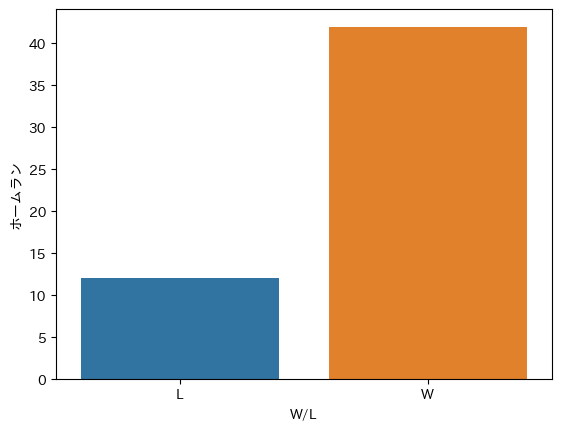

In [27]:
import seaborn as sns
import japanize_matplotlib
WL_sum = ohtani_df.groupby('W/L').sum(numeric_only=True)
sns.barplot( x = 'W/L', y='ホームラン', hue='W/L', data=WL_sum)

### 2. 折れ線グラフ :  横軸は試合数、縦軸は得点数



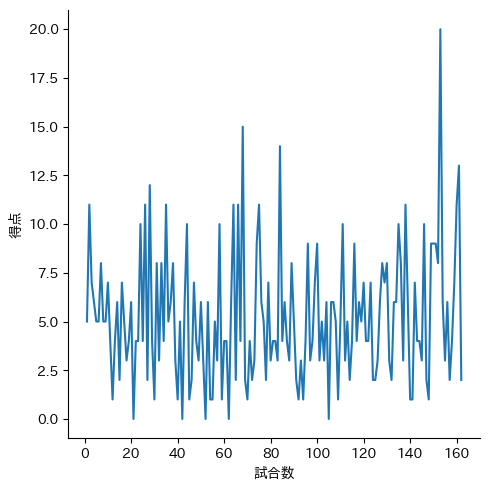

In [30]:
sns.relplot(x='試合数', y='得点',  data=dodgers_df, kind="line")

### 3. 散布図 : ドジャーズ試合別得点と観客数

<Axes: xlabel='得点', ylabel='観客数'>

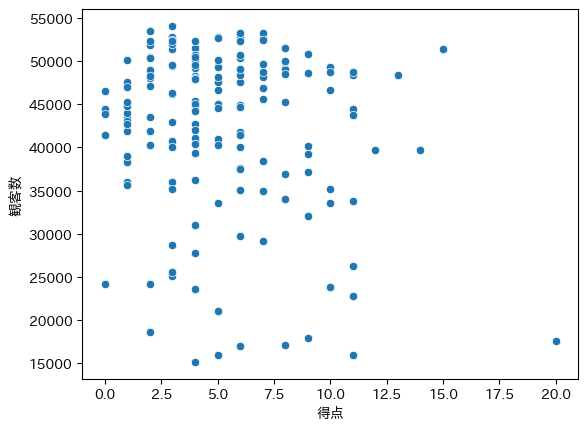

In [35]:
sns.scatterplot( x = '得点', y ='観客数', data=dodgers_df)


## クラッチプレーヤーはいるのか？　スポーツゲームにおけるデータサイエンス的な課題  
[参考記事](https://topics.smt.docomo.ne.jp/article/searchkoreanews/world/searchkoreanews-32341?redirect=1)  
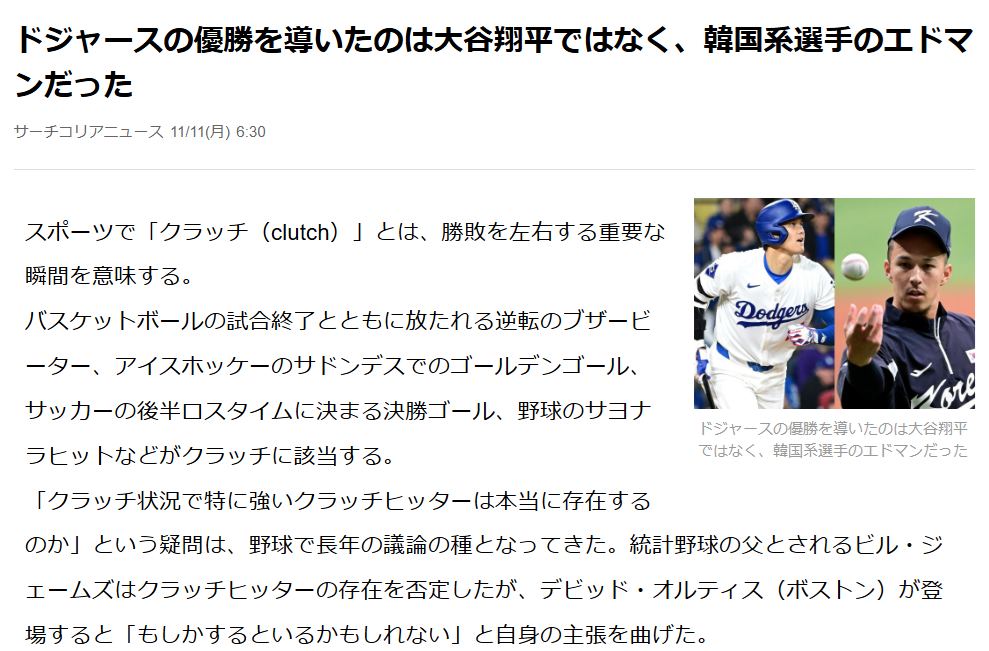

# MLBデータ
### 1. ドジャース2024 ゲーム毎の勝敗と成績  
https://www.baseball-reference.com/teams/LAD/2024-schedule-scores.shtml#all_team_schedule
### 2. ドジャース2024 ゲーム毎の打撃成績詳細
日付をクリックするとスコアボードおよび選手別の各回のパフォーマンスが表示される
https://www.foxsports.com/mlb/los-angeles-dodgers-team-game-log?category=hitting&season=2024&seasonType=reg
### 3. 大谷翔平2024 ゲーム毎の打撃成績
日付をクリックするとスコアボードと各回の得点詳細も表示される
https://www.statmuse.com/mlb/player/shohei-ohtani-67561/game-log?seasonYear=2024&perspective=batting&statType=standard
- 得点シーンの例 Top 3：3回表，
Shohei Ohtani triples to right field. Miguel Rojas scores：大谷翔平が3塁打(Triple)を打ち、ロハスがホームを踏んだ(scores).e

### 4. 大谷翔平2024 ゲーム毎　打席毎のパフォーマンス
https://times.abema.tv/articles/-/10018233

## MLB関連参考リンク
- https://www.mlb.com/player/shohei-ohtani-660271?stats=gamelogs-r-hitting-mlb&year=2024    
- https://www.espn.com/mlb/team/schedule/_/name/lad/seasontype/2/half/2    
- https://www.baseball-reference.com/teams/LAD/2024-schedule-scores.shtml#all_team_schedule  
- https://fixturedownload.com/results/mlb-2024/los-angeles-dodgers  
- https://www.espn.com/mlb/game/_/gameId/401569928/red-sox-dodgers  
- https://www.foxsports.com/mlb/los-angeles-dodgers-team-game-log?category=hitting&season=2024&seasonType=reg  
- https://www.foxsports.com/mlb/los-angeles-dodgers-vs-colorado-rockies-sep-29-2024-game-boxscore-90645?tab=boxscore  